In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/stroke_data.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
1,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
2,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
3,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
4,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0


In [4]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [5]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

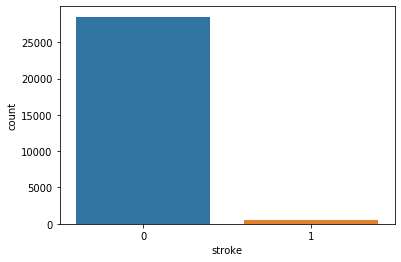

In [6]:
sns.countplot(x='stroke', data=df)

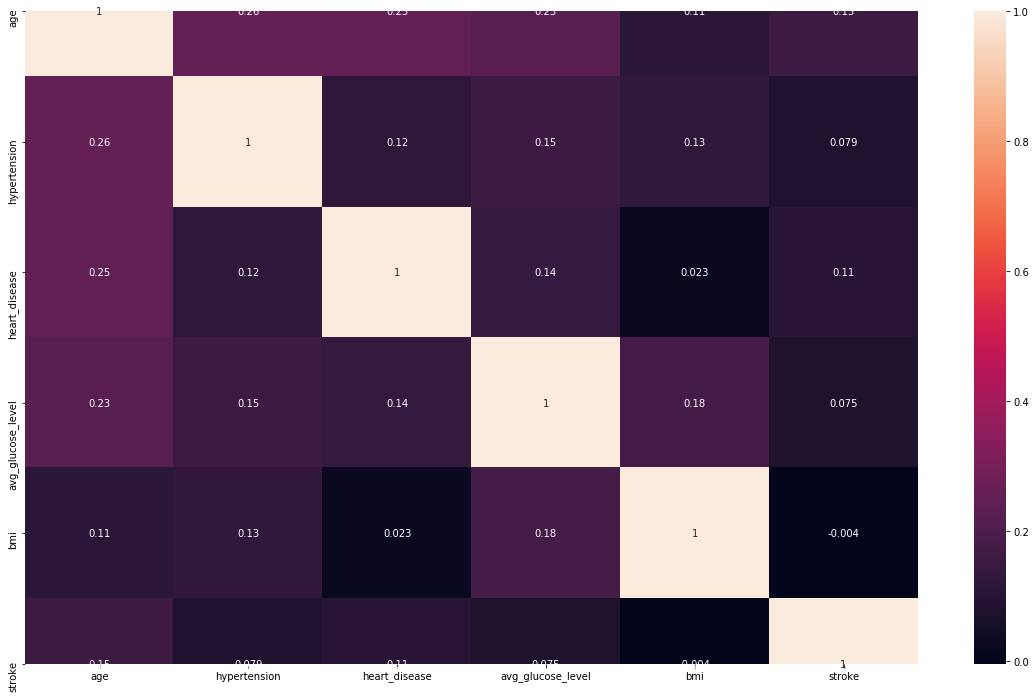

In [7]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29065 entries, 0 to 29064
Data columns (total 11 columns):
gender               29065 non-null object
age                  29065 non-null float64
hypertension         29065 non-null int64
heart_disease        29065 non-null int64
ever_married         29065 non-null object
work_type            29065 non-null object
Residence_type       29065 non-null object
avg_glucose_level    29065 non-null float64
bmi                  29065 non-null float64
smoking_status       29065 non-null object
stroke               29065 non-null int64
dtypes: float64(3), int64(3), object(5)
memory usage: 2.4+ MB


In [9]:
df.select_dtypes(['object']).columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [10]:
#Gender

dummies = pd.get_dummies(df['gender'],drop_first=True)
df = pd.concat([df.drop('gender', axis=1), dummies], axis=1)

In [11]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status',
       'stroke', 'Male'],
      dtype='object')

In [12]:
dummies = pd.get_dummies(df['ever_married'],drop_first=True)
df = pd.concat([df.drop('ever_married', axis=1), dummies], axis=1)
# df['ever_married']=df['ever_married'].apply(lambda ever_married: 1 if 'Yes' else 0)

In [13]:
dummies = pd.get_dummies(df['work_type'],drop_first=True)
df = pd.concat([df.drop('work_type', axis=1), dummies], axis=1)

In [14]:
dummies = pd.get_dummies(df['Residence_type'],drop_first=True)
df = pd.concat([df.drop('Residence_type', axis=1), dummies], axis=1)

In [15]:
dummies = pd.get_dummies(df['smoking_status'],drop_first=True)
df = pd.concat([df.drop('smoking_status', axis=1), dummies], axis=1)

In [16]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'Male', 'Yes', 'Never_worked', 'Private', 'Self-employed',
       'children', 'Urban', 'never smoked', 'smokes'],
      dtype='object')

In [17]:
df.rename({'Yes': 'married'}, inplace=True)

In [18]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Male,Yes,Never_worked,Private,Self-employed,children,Urban,never smoked,smokes
0,58.0,1,0,87.96,39.2,0,1,1,0,1,0,0,1,1,0
1,70.0,0,0,69.04,35.9,0,0,1,0,1,0,0,0,0,0
2,52.0,0,0,77.59,17.7,0,0,1,0,1,0,0,1,0,0
3,75.0,0,1,243.53,27.0,0,0,1,0,0,1,0,0,1,0
4,32.0,0,0,77.67,32.3,0,0,1,0,1,0,0,0,0,1


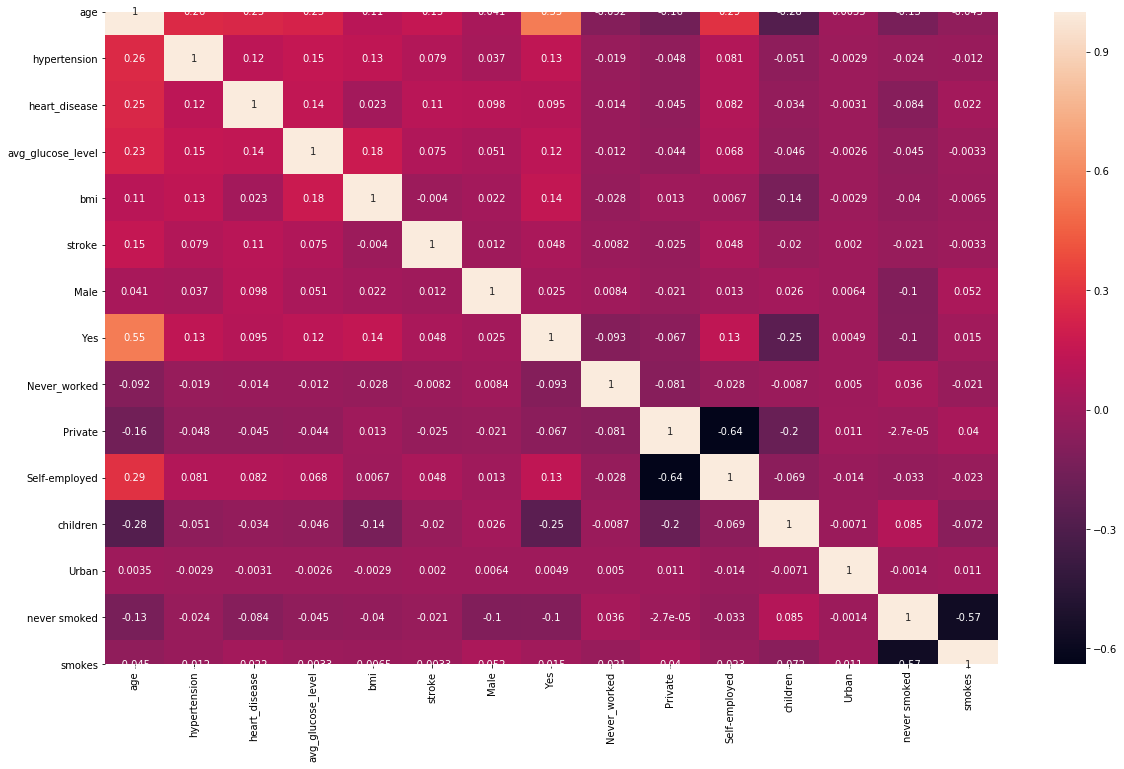

In [19]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True)

In [20]:
df.rename(columns={'Yes':'married'}, inplace=True)

In [21]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'Male', 'married', 'Never_worked', 'Private', 'Self-employed',
       'children', 'Urban', 'never smoked', 'smokes'],
      dtype='object')

In [22]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Male,married,Never_worked,Private,Self-employed,children,Urban,never smoked,smokes
0,58.0,1,0,87.96,39.2,0,1,1,0,1,0,0,1,1,0
1,70.0,0,0,69.04,35.9,0,0,1,0,1,0,0,0,0,0
2,52.0,0,0,77.59,17.7,0,0,1,0,1,0,0,1,0,0
3,75.0,0,1,243.53,27.0,0,0,1,0,0,1,0,0,1,0
4,32.0,0,0,77.67,32.3,0,0,1,0,1,0,0,0,0,1


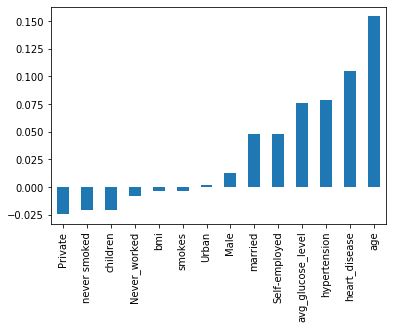

In [23]:
df.corr()['stroke'].drop('stroke').sort_values().plot(kind='bar')

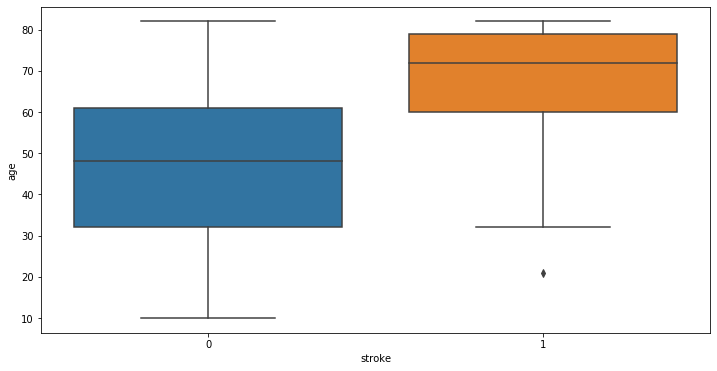

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(x='stroke', y='age', data=df)

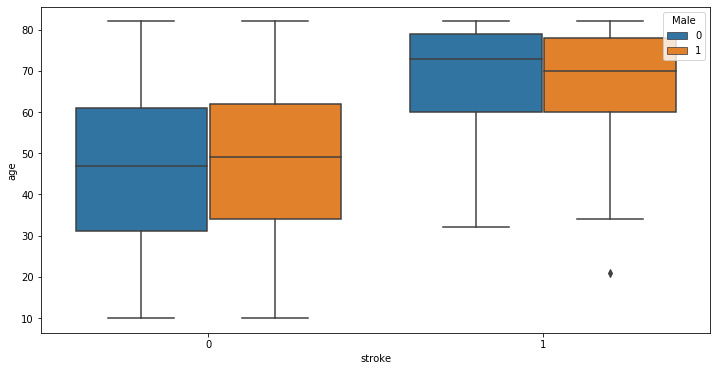

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(x='stroke', y='age', data=df, hue='Male')

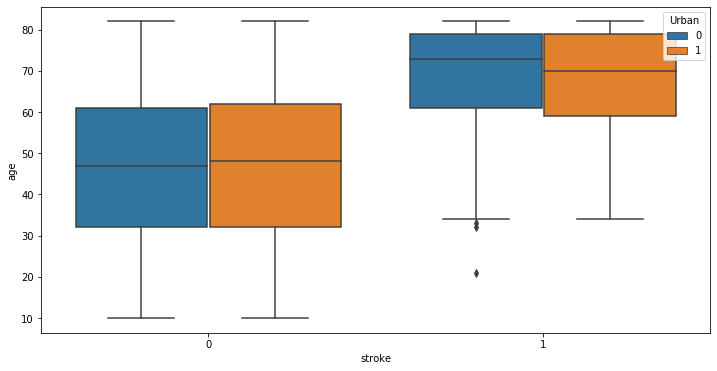

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(x='stroke', y='age', data=df, hue='Urban')

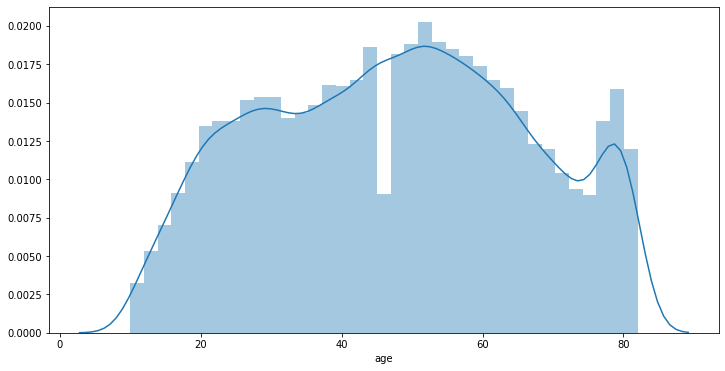

In [27]:
plt.figure(figsize=(12, 6))
sns.distplot(df['age'])

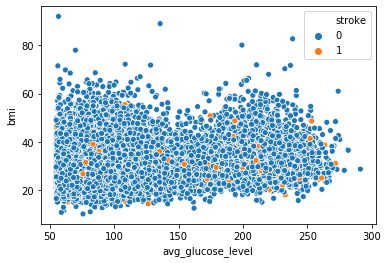

In [28]:
sns.scatterplot(x='avg_glucose_level', y='bmi', data=df, hue='stroke')

In [29]:
df.shape

(29065, 15)

In [30]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'Male', 'married', 'Never_worked', 'Private', 'Self-employed',
       'children', 'Urban', 'never smoked', 'smokes'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29065 entries, 0 to 29064
Data columns (total 15 columns):
age                  29065 non-null float64
hypertension         29065 non-null int64
heart_disease        29065 non-null int64
avg_glucose_level    29065 non-null float64
bmi                  29065 non-null float64
stroke               29065 non-null int64
Male                 29065 non-null uint8
married              29065 non-null uint8
Never_worked         29065 non-null uint8
Private              29065 non-null uint8
Self-employed        29065 non-null uint8
children             29065 non-null uint8
Urban                29065 non-null uint8
never smoked         29065 non-null uint8
smokes               29065 non-null uint8
dtypes: float64(3), int64(3), uint8(9)
memory usage: 3.1 MB


In [32]:
X = df.drop('stroke', axis=1).values
y = df['stroke'].values

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
sm = SMOTE(random_state = 42)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [36]:
X_train_new, y_train_new = sm.fit_resample(X_train, y_train)

In [37]:
df['stroke'].sum()

548

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()

In [40]:
X_train_new = scaler.fit_transform(X_train_new)

In [41]:
X_test = scaler.transform(X_test)

In [42]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

In [43]:
X_train.shape

(17439, 14)

In [44]:
model = Sequential()

model.add(Dense(14, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')


In [45]:
from tensorflow.keras.callbacks import EarlyStopping

In [46]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [47]:
model.fit(x=X_train_new, y=y_train_new, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stop])

2022-08-06 21:59:13.165054: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2022-08-06 21:59:13.190724: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2419200000 Hz
2022-08-06 21:59:13.191161: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55e44b6a9d20 executing computations on platform Host. Devices:
2022-08-06 21:59:13.191173: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version


Train on 34196 samples, validate on 11626 samples
Epoch 1/100
34196/34196 [==============================] - 1s 41us/sample - loss: 0.5703 - val_loss: 0.4989
Epoch 2/100
34196/34196 [==============================] - 1s 28us/sample - loss: 0.4707 - val_loss: 0.4095
Epoch 3/100
34196/34196 [==============================] - 1s 28us/sample - loss: 0.4432 - val_loss: 0.4432
Epoch 4/100
34196/34196 [==============================] - 1s 30us/sample - loss: 0.4214 - val_loss: 0.3485
Epoch 5/100
34196/34196 [==============================] - 1s 27us/sample - loss: 0.4018 - val_loss: 0.3434
Epoch 6/100
34196/34196 [==============================] - 1s 30us/sample - loss: 0.3879 - val_loss: 0.2590
Epoch 7/100
34196/34196 [==============================] - 1s 28us/sample - loss: 0.3752 - val_loss: 0.3037
Epoch 8/100
34196/34196 [==============================] - 1s 28us/sample - loss: 0.3673 - val_loss: 0.3015
Epoch 9/100
34196/34196 [==============================] - 1s 28us/sample - loss: 0.35

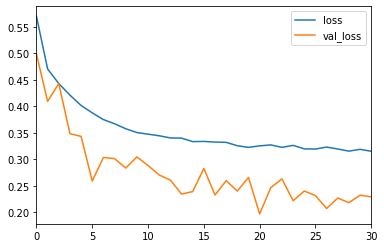

In [48]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [49]:
predictions = model.predict_classes(X_test)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95     11419
           1       0.07      0.33      0.11       207

    accuracy                           0.91     11626
   macro avg       0.53      0.62      0.53     11626
weighted avg       0.97      0.91      0.94     11626



In [53]:
print(confusion_matrix(y_test, predictions))

[[10459   960]
 [  138    69]]


In [54]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

stroke = df.drop('stroke',axis=1).iloc[random_ind]
stroke

age                   54.00
hypertension           0.00
heart_disease          1.00
avg_glucose_level    141.17
bmi                   26.40
Male                   1.00
married                1.00
Never_worked           0.00
Private                1.00
Self-employed          0.00
children               0.00
Urban                  1.00
never smoked           0.00
smokes                 1.00
Name: 19043, dtype: float64

In [55]:
stroke = stroke.values.reshape((1, 14))

In [56]:
model.predict_classes(stroke)

array([[1]], dtype=int32)